# Data Set

In [ ]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)
train_input.shape, test_input.shape, train_target.shape, test_target.shape

((42,), (14,), (42,), (14,))

In [ ]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


# KNN Regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)
knr.score(test_input, test_target)

0.9746459963987609

## Predict a data 1
- the weight of a 50-centimeter-long perch

In [ ]:
print(knr.predict([[50]]))

[1033.33333333]


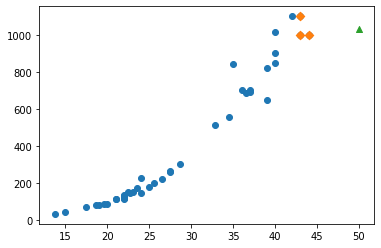

In [ ]:
import matplotlib.pyplot as plt

distances, indexes = knr.kneighbors([[50]])

fig, ax = plt.subplots()
ax.scatter(train_input, train_target)
ax.scatter(train_input[indexes], train_target[indexes], marker="D") # 3 neighbors
ax.scatter(50, knr.predict([[50]]), marker='^') # new data
plt.show()

## Predict a data 2
- the weight of a 100-centimeter-long perch

In [ ]:
print(knr.predict([[100]]))

[1033.33333333]


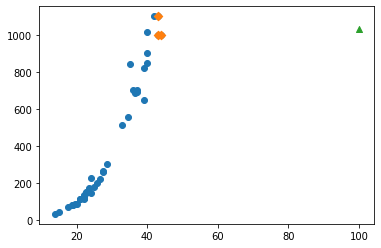

In [ ]:
distances, indexes = knr.kneighbors([[100]])

fig, ax = plt.subplots()
ax.scatter(train_input, train_target)
ax.scatter(train_input[indexes], train_target[indexes], marker="D") # 3 neighbors
ax.scatter(100, knr.predict([[100]]), marker='^') # new data
plt.show()

- Beyond the scope of the new training set, incorrect values can be predicted.

- No matter how big the length is, the weight doesn't increase anymore.

※ Machine learning models must be trained periodically.
> MLOps (Machine Learning & Opearations)
- the essential skill for data scientist, ML engineer.

# Linear Regression
- in statistics:
  + The process of finding causal relationships is more important.
  + 4 assumptions (linearity, normality, independence, equal variance)
- in ML:
  + Predicting results is more important.
  + R-squared, MAE, RMSE, etc

## Predict a data

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(train_input, train_target)
print(lr.predict([[50]]))

[1241.83860323]


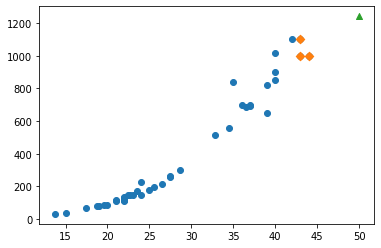

In [ ]:
fig, ax = plt.subplots()
ax.scatter(train_input, train_target)
ax.scatter(train_input[indexes], train_target[indexes], marker="D") # 3 neighbors
ax.scatter(50, lr.predict([[50]]), marker='^') # new data
plt.show()

## Regression equation
- coef_ : regression coefficient(weight)
- intercept_ : regression intercept
> $y = a + bx$
- coefficient & intercept : model parameter
  + Linear Regression is a model-based learning.
  + KNN Regression is a case-based learning.

In [ ]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


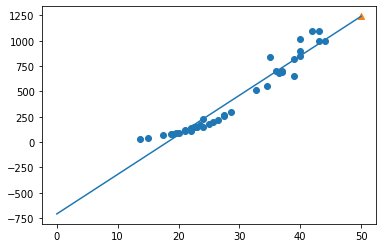

In [ ]:
fig, ax = plt.subplots()

# scatter plot of training set
ax.scatter(train_input, train_target)

# linear equation from 0 to 50
ax.plot([0,50], [0*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

ax.scatter(50, lr.predict([[50]]), marker="^")
ax.set_label("length")
ax.set_label("weight")
plt.show()

In [ ]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target)) # Underfitting

0.939846333997604
0.8247503123313558


- The model is so simple that it is underfit overall.
  + It seems that polynomial regression is needed.

# Polynomial Regression
- coef_ : regression coefficients(weights)
- intercept_ : regression intercept
> $y = a + b_1x_1 + b_2x_2 + ... + b_nx_n$



## Predict a data

In [ ]:
# Broadcasting in Numpy
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


※ Broadcasting in Numpy
- tutorial : https://numpy.org/doc/stable/user/basics.broadcasting.html



In [ ]:
lr2 = LinearRegression()
lr2.fit(train_poly, train_target)
print(lr2.predict([[50**2, 50]]))

[1573.98423528]


## Regression equation

In [ ]:
print(lr2.coef_, lr2.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


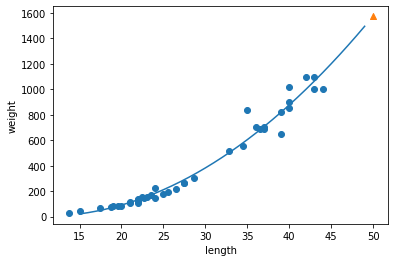

In [ ]:
point = np.arange(15,50)

fig, ax = plt.subplots()
ax.scatter(train_input, train_target)
ax.plot(point,  lr2.coef_[0]*point**2 + lr2.coef_[1]*point + lr2.intercept_)
ax.scatter(50, lr2.predict([[50**2, 50]]), marker="^")
ax.set_xlabel('length')
ax.set_ylabel('weight')
plt.show()

In [ ]:
print(lr2.score(train_poly, train_target))
print(lr2.score(test_poly, test_target)) # Underfitting

0.9706807451768623
0.9775935108325122


- The model has improved a lot, but it is still underfit.
  + It seems that a more complex model is needed.